### 1. Prepare data for ingestion into the neural network.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

volume  close_lag1  close_lag2  close_lag3  close_lag4  close_lag5  \
0 -0.464011   -0.767950   -0.747017   -0.739101   -0.639217   -0.669514   
1 -0.190969   -0.769480   -0.758587   -0.738967   -0.732728   -0.632766   
2 -0.723175   -0.760056   -0.760125   -0.750631   -0.732592   -0.727153   
3 -0.570132   -0.763094   -0.750650   -0.752182   -0.744357   -0.727016   
4 -0.692599   -0.760123   -0.753705   -0.742630   -0.745922   -0.738891   

   close_lag6      ma_3     rsi_3      ma_6     rsi_6      ma_9     rsi_9  \
0   -0.646494  0.627785 -1.812133  4.368171 -1.830292  7.716514 -1.862736   
1   -0.662760 -0.579982 -1.183392  1.505926 -1.592107  3.501353 -1.710687   
2   -0.625758 -0.115027 -1.286573  0.152772 -1.626297  2.429129 -1.732050   
3   -0.720797 -0.092085 -0.982726 -0.217920 -1.529132  1.347659 -1.674853   
4   -0.720659 -0.694639 -0.034087 -0.992704 -1.141034 -0.009939 -1.444629   

      ma_12    rsi_12     event     close  
0  8.506598 -1.880503 -0.456953  2.338571  
1  5.255354 -1.767605 -0.456953  2.945714  
2  4.553852 -1.782792 -0.456953  2.750000  
3  2.875177 -1.742103 -0.456953  2.941429  
4  1.005462 -1.579137 -0.456953  3.678571

In [3]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import random
random.seed(100)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)

In [7]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)

In [8]:
X_train.shape

(156, 16)

In [9]:
X_test.shape

(20, 16)

In [10]:
X_val.shape

(20, 16)

In [11]:
def num_steps(length: int, batch_size: int):
    '''
    calculates number of steps from dataset and the batch size
    
    Parameters
    ----------
    
    length: the total length of the dataset
    batch_size: size of each batch
    
    Returns
    -------
    
    number_of_steps: number of steps per epoch
    
    '''
    return length//batch_size + 1

In [12]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

### 2.  Define the neural network layers and model.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [14]:
def stock_predictor_model(x_train):
    '''
    Define the stock predictor model
    '''
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mean_absolute_percentage_error'])
    return stock_predictor

In [15]:
model = stock_predictor_model(X_train)

### 3.  Visualize keras model by using Pydot

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

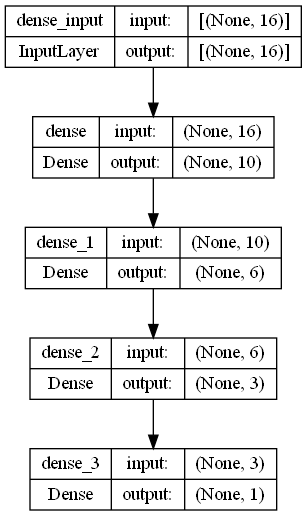

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### 4. Train the model using basic parameters.

In [19]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [20]:
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
8/8 [==============================] - 3s 75ms/step - loss: 4812.7324 - mean_absolute_percentage_error: 98.2891 - val_loss: 24437.6309 - val_mean_absolute_percentage_error: 99.1859
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 4803.2700 - mean_absolute_percentage_error: 97.7546 - val_loss: 24421.7539 - val_mean_absolute_percentage_error: 98.9361
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 4794.2847 - mean_absolute_percentage_error: 97.2544 - val_loss: 24404.8691 - val_mean_absolute_percentage_error: 98.6558
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 4785.1343 - mean_absolute_percentage_error: 96.6729 - val_loss: 24388.9121 - val_mean_absolute_percentage_error: 98.3187
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 4775.4370 - mean_absolute_percentage_error: 96.1192 - val_loss: 24373.1211 - val_mean_absolute_percentage_error: 97.9732
Epoch 6/1000
8/8 [==============

### 5. Analyse the model performance using loss and accuracy curves

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

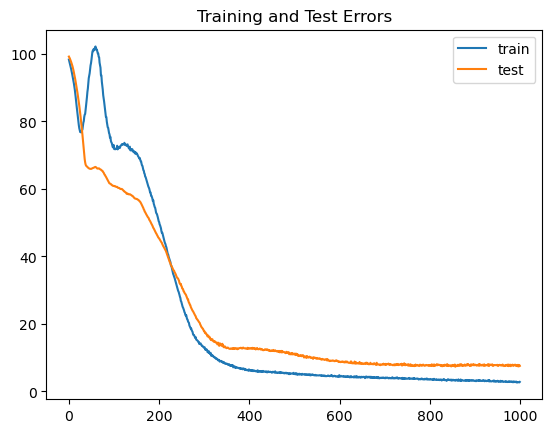

In [22]:
# plot training history
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

### 6. Hyperparameter tuning of neural network

install talos using **pip install talos**

In [27]:
import talos
from talos.model.hidden_layers import hidden_layers

In [28]:
p = {'lr': (0.1,0.5,10),
     'first_neuron':[10, 20],
     'hidden_layers':[1, 2, 3],
     'batch_size': (10,30,5),
     'epochs': [500],
     'dropout': (0, 0.5, 5),
     'shapes':['brick','funnel'],
      'activation': ['relu']
    }

**Funnel**
     
Funnel is the shape that roughly looks like an upside-dowm pyramind, so that the first layer is defined with max neurons, and the next layers are sligtly decreased compared to previous ones.

<img src='funnel.png' />

**Brick**

All the layers have first_neuron value. Called by shape='brick'.

<img src='brick.png' />

In [31]:
def stock_prediction_model(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
    hidden_layers(model, params, 1)
   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    
    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(learning_rate=params['lr']),
                  metrics=['mape'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [33]:
t = talos.Scan(x=X_train,
            y=Y_train,x_val=X_val,y_val=Y_val,
            model=stock_prediction_model,
            params=p,
            experiment_name='stock_exp',
            fraction_limit=0.01)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [22:57<00:00, 45.91s/it]


In [34]:
# accessing the results data frame
t.data.head()

start              end   duration  round_epochs         loss  \
0  06/17/24-200409  06/17/24-200455  45.282966           500  2500.797363   
1  06/17/24-200455  06/17/24-200537  42.237832           500  1642.950562   
2  06/17/24-200538  06/17/24-200625  47.195035           500  1971.353149   
3  06/17/24-200625  06/17/24-200711  45.830923           500  3513.731689   
4  06/17/24-200712  06/17/24-200801  49.616248           500  4834.015625   

         mape      val_loss    val_mape    lr  first_neuron  hidden_layers  \
0  530.508301  19390.232422  273.495209  0.42            10              3   
1  345.410645  19616.912109  140.699265  0.34            10              3   
2  273.905670  15484.326172  161.521210  0.30            10              1   
3  190.067383  15857.596680   80.664047  0.18            20              3   
4  100.000000  24476.378906  100.000000  0.46            10              1   

   batch_size  epochs  dropout  shapes activation  
0          18     500      0.2   brick       relu  
1          22     500      0.2   brick       relu  
2          14     500      0.3   brick       relu  
3          18     500      0.3   brick       relu  
4          10     500      0.4  funnel       relu

In [35]:
# access the summary details
t.details

experiment_name               stock_exp
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
experiment_id              061724200409
complete_time            06/17/24/20:27
x_shape                       (156, 16)
y_shape                          (156,)
dtype: object

In [36]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [37]:
# access the dataframe with the results
analyze_object.data.head()

start              end   duration  round_epochs         loss  \
0  06/17/24-200409  06/17/24-200455  45.282966           500  2500.797363   
1  06/17/24-200455  06/17/24-200537  42.237832           500  1642.950562   
2  06/17/24-200538  06/17/24-200625  47.195035           500  1971.353149   
3  06/17/24-200625  06/17/24-200711  45.830923           500  3513.731689   
4  06/17/24-200712  06/17/24-200801  49.616248           500  4834.015625   

         mape      val_loss    val_mape    lr  first_neuron  hidden_layers  \
0  530.508301  19390.232422  273.495209  0.42            10              3   
1  345.410645  19616.912109  140.699265  0.34            10              3   
2  273.905670  15484.326172  161.521210  0.30            10              1   
3  190.067383  15857.596680   80.664047  0.18            20              3   
4  100.000000  24476.378906  100.000000  0.46            10              1   

   batch_size  epochs  dropout  shapes activation  
0          18     500      0.2   brick       relu  
1          22     500      0.2   brick       relu  
2          14     500      0.3   brick       relu  
3          18     500      0.3   brick       relu  
4          10     500      0.4  funnel       relu

In [38]:
# get the number of rounds in the Scan
analyze_object.rounds()

30

In [40]:
# get the highest result for any metric
analyze_object.low('mape')

21.70475959777832

In [43]:
analyze_object.data[analyze_object.data.mape==21.70475959777832]

start              end   duration  round_epochs       loss  \
18  06/17/24-201753  06/17/24-201834  41.436793           500  32.345634   

        mape      val_loss   val_mape   lr  first_neuron  hidden_layers  \
18  21.70476  10555.801758  23.700886  0.1            20              1   

    batch_size  epochs  dropout shapes activation  
18          18     500      0.0  brick       relu

In [45]:
analyze_object.data.iloc[::]

start              end   duration  round_epochs         loss  \
0   06/17/24-200409  06/17/24-200455  45.282966           500  2500.797363   
1   06/17/24-200455  06/17/24-200537  42.237832           500  1642.950562   
2   06/17/24-200538  06/17/24-200625  47.195035           500  1971.353149   
3   06/17/24-200625  06/17/24-200711  45.830923           500  3513.731689   
4   06/17/24-200712  06/17/24-200801  49.616248           500  4834.015625   
5   06/17/24-200802  06/17/24-200844  42.549564           500   453.328979   
6   06/17/24-200845  06/17/24-200928  43.624962           500  1370.135620   
7   06/17/24-200929  06/17/24-201019  49.861321           500  4834.016113   
8   06/17/24-201020  06/17/24-201102  41.848608           500  1313.014771   
9   06/17/24-201102  06/17/24-201148  46.220188           500   695.337708   
10  06/17/24-201149  06/17/24-201228  39.363472           500   358.582855   
11  06/17/24-201228  06/17/24-201315  46.653641           500    10.610703   
12  06/17/24-201316  06/17/24-201355  39.481425           500   469.811554   
13  06/17/24-201356  06/17/24-201433  37.860664           500  4834.016113   
14  06/17/24-201434  06/17/24-201512  38.462800           500  4834.016113   
15  06/17/24-201513  06/17/24-201606  53.595369           500   306.925262   
16  06/17/24-201607  06/17/24-201657  50.263683           500   469.205475   
17  06/17/24-201658  06/17/24-201752  54.810696           500   997.371521   
18  06/17/24-201753  06/17/24-201834  41.436793           500    32.345634   
19  06/17/24-201835  06/17/24-201918  42.838592           500  2493.933838   
20  06/17/24-201918  06/17/24-202009  50.884050           500  1519.127075   
21  06/17/24-202009  06/17/24-202051  41.060516           500  2619.137939   
22  06/17/24-202051  06/17/24-202136  44.576063           500  4834.016113   
23  06/17/24-202136  06/17/24-202231  54.786249           500  4834.016113   
24  06/17/24-202231  06/17/24-202314  42.555096           500  4834.015625   
25  06/17/24-202314  06/17/24-202409  54.685150           500  2503.873535   
26  06/17/24-202410  06/17/24-202453  43.656318           500   820.491760   
27  06/17/24-202454  06/17/24-202535  41.700990           500  1263.313599   
28  06/17/24-202536  06/17/24-202623  46.762800           500  2174.383057   
29  06/17/24-202623  06/17/24-202706  42.955528           500  4834.016602   

          mape      val_loss    val_mape    lr  first_neuron  hidden_layers  \
0   530.508301  19390.232422  273.495209  0.42            10              3   
1   345.410645  19616.912109  140.699265  0.34            10              3   
2   273.905670  15484.326172  161.521210  0.30            10              1   
3   190.067383  15857.596680   80.664047  0.18            20              3   
4   100.000000  24476.378906  100.000000  0.46            10              1   
5    98.763763  14915.458008   64.367622  0.38            10              1   
6   315.940369  15839.276367  142.822220  0.22            10              2   
7   100.000000  24476.378906  100.000000  0.30            20              1   
8   265.664825  16391.373047  122.551857  0.10            10              2   
9   135.197723  15517.851562   77.601410  0.34            10              3   
10   50.242493  13422.447266   75.926010  0.26            20              1   
11   22.417439  11020.732422   21.051769  0.10            20              1   
12  120.621635   9667.705078   57.894764  0.22            20              1   
13  100.000000  24476.378906  100.000000  0.34            20              2   
14  100.000000  24476.378906  100.000000  0.42            10              1   
15   66.683929  10914.656250   28.981915  0.10            20              2   
16   77.612251  16716.646484   31.107946  0.14            10              1   
17   88.614784  16056.302734   81.281563  0.26            20              3   
18   21.704760  10555.801758   23.700886  0.10            20              1   
19  536.269104 

findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not

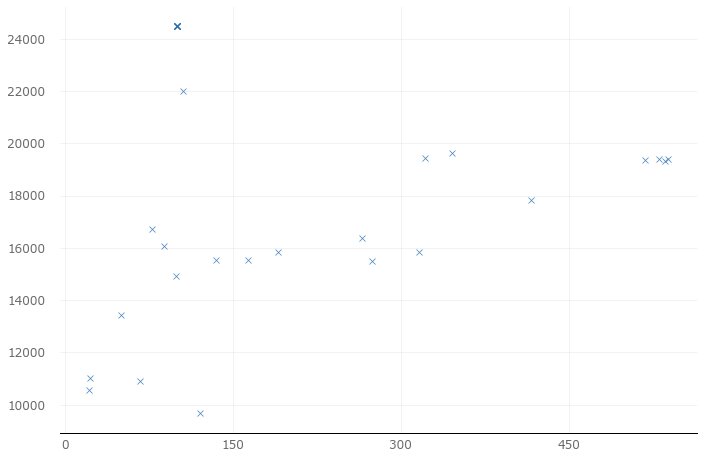

In [72]:
warnings.filterwarnings("ignore", message="findfont: Font family 'Geneva' not found.")

analyze_object.plot_regs('mape', 'val_loss')

findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not

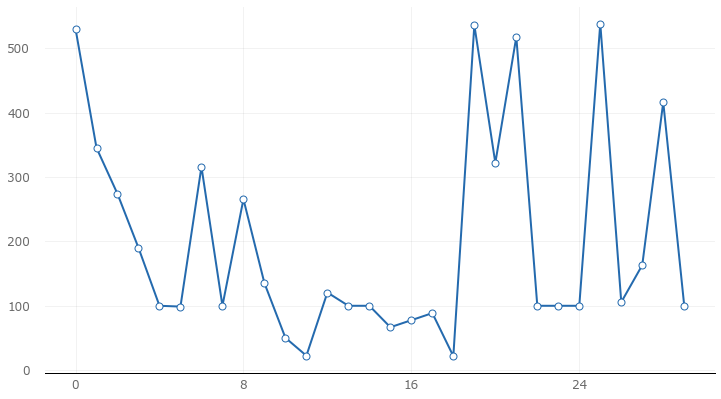

In [73]:
analyze_object.plot_line('mape')

findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not

findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not found.
findfont: Font family 'Geneva' not

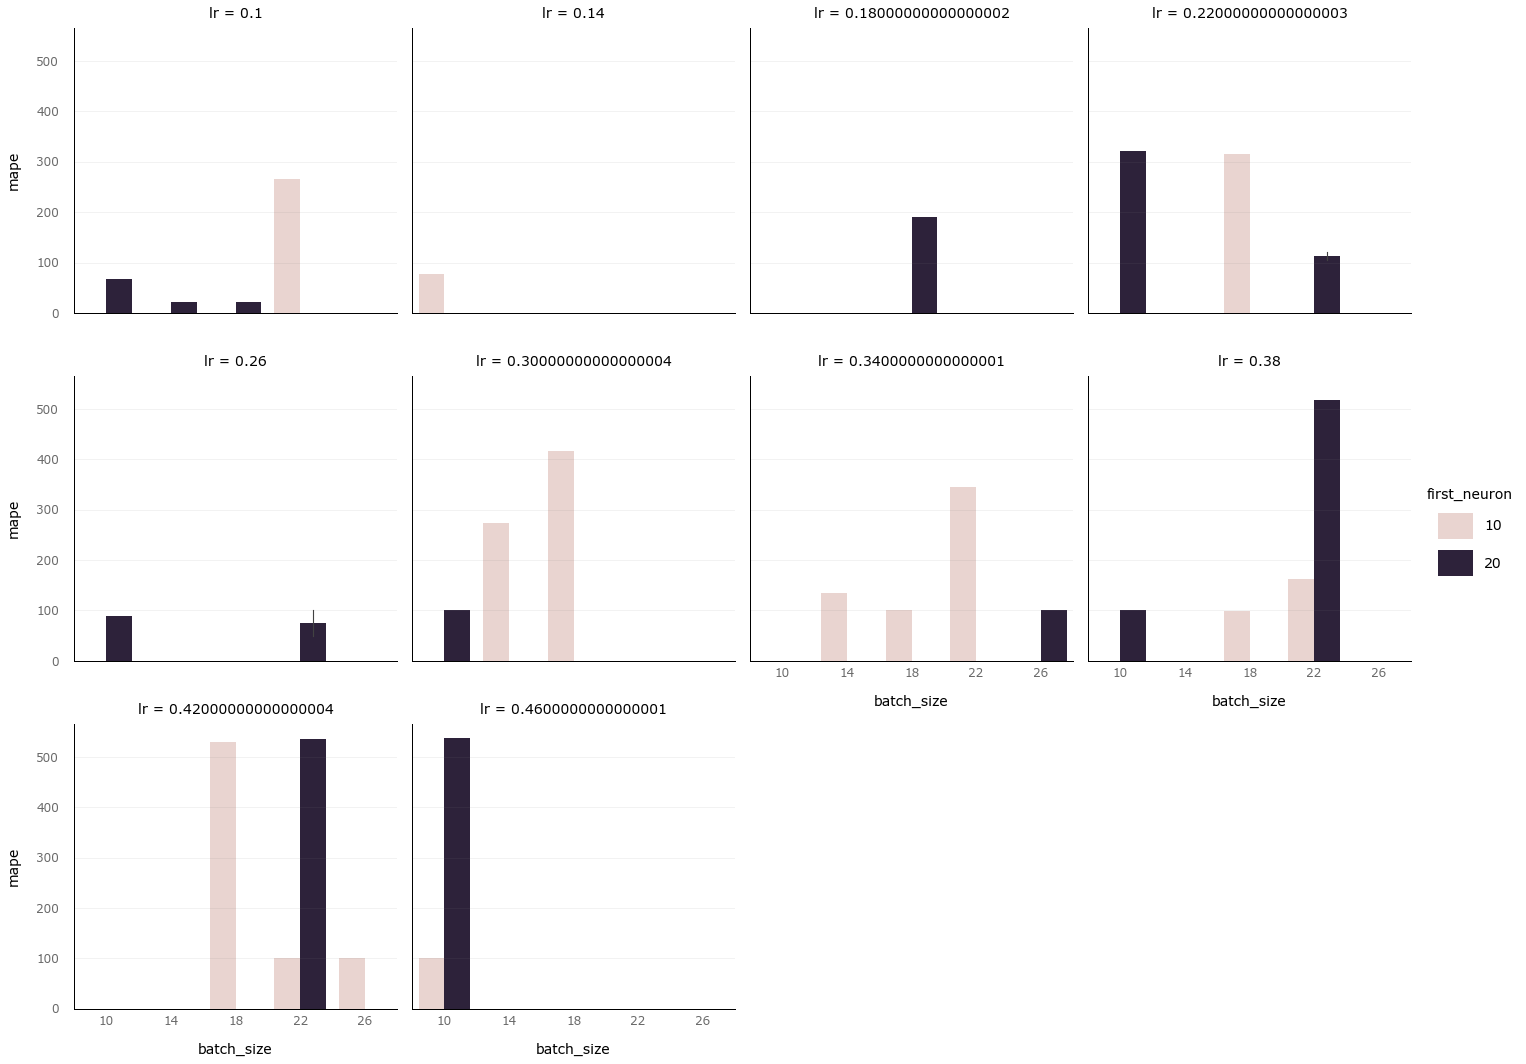

In [75]:
import seaborn as sbn

df = analyze_object.data

sbn.catplot(data=df, x='batch_size', y='mape', hue='first_neuron', col='lr', kind='bar', col_wrap=4)


### 7. Generating predictions by using the trained model

In [77]:
best_model = t.best_model(metric='mape', asc=True)

In [78]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 781 (3.05 KB)
Trainable params: 781 (3.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
import numpy as np
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    measures mape score
    """

#     y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [80]:
mean_absolute_percentage_error(Y_test, best_model.predict(X_test)[:,-1])

1/1 [==============================] - 1s 1s/step


13.615749247517735